# **WOMEN CLOTH REVIEWS WITH MULTINOMIAL NAIVE BAYES**

**The multinomialnaivebayes classifier is suitable for classification with discreate features(e.g., word counts for text classifiaction). The multinomial distribution normally requires integer feature counts. However in practice,fractionalcounts such as TF-IDF may also work**

**IMPORT LIBRARIES**

In [209]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

**IMPORT DATASET**

In [210]:
df = pd.read_csv('https://raw.githubusercontent.com/YBIFoundation/ProjectHub-MachineLearning/main/Women%20Clothing%20E-Commerce%20Review.csv')

In [211]:
df.head()

,Clothing ID,Age,Title,Review,Rating,Recommended,Positive Feedback,Division,Department,Category
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [212]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Clothing ID        23486 non-null  int64 
 1   Age                23486 non-null  int64 
 2   Title              19676 non-null  object
 3   Review             22641 non-null  object
 4   Rating             23486 non-null  int64 
 5   Recommended        23486 non-null  int64 
 6   Positive Feedback  23486 non-null  int64 
 7   Division           23472 non-null  object
 8   Department         23472 non-null  object
 9   Category           23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.8+ MB
None


**DATA DESCRIBE**

In [213]:
df.describe()

,Clothing ID,Age,Rating,Recommended,Positive Feedback
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,918.118709,43.198544,4.196032,0.822362,2.535936
std,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,18.000000,1.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000


In [214]:
print(df.shape)

(23486, 10)


**DATA CLEANING**

In [184]:
# Check Missing Values
print(df.isna().sum())

Clothing ID             0
Age                     0
Title                3810
Review                845
Rating                  0
Recommended             0
Positive Feedback       0
Division               14
Department             14
Category               14
dtype: int64


In [185]:
# Handling Missing Values
df[df['Review'] == ''] = np.NaN
df['Review'].fillna('No Review', inplace=True)
df.dropna(inplace=True)

/tmp/ipykernel_33/4001170164.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Review'].fillna('No Review', inplace=True)


**DEFINE TARGET Y AND FEATURE X**

In [186]:
# Define Target (Y) and Feature (X)
X = df['Review']
y = df['Rating']

**TRAIN_TEST_SPLIT**

In [187]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=2529)

**GET FEATURE TEST CONVERSION INTO TOKENS**

In [188]:
# Feature Extraction using CountVectorizer
cv = CountVectorizer(lowercase=True, analyzer='word', ngram_range=(2, 3), stop_words='english', max_features=50000)
X_train = cv.fit_transform(X_train)
X_test = cv.transform(X_test)

In [202]:
X_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [204]:
cv.get_feature_names_out()

array(['00 big', '00 petite', '00 regular', ..., 'zipper pockets',
       'zipper wouldn', 'zippers buttons'], dtype=object)

In [205]:
X_test.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

**GET MODEL TRAIN**

In [189]:
# Train Multinomial Naive Bayes Model
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [190]:
y_pred = model.predict(X_test)

In [201]:
y_pred.shape

(5899,)

In [191]:
print(y_pred)

[5 5 4 ... 3 3 5]


**GET PROBABLITY OF EACH PREDICTED CLASS**

In [198]:
model.predict_proba(X_test)

array([[1.40023583e-05, 2.19176097e-07, 2.04601259e-03, 1.18646690e-03,
        9.96753299e-01],
       [8.96966557e-05, 1.61265547e-03, 1.27102962e-02, 1.44616396e-02,
        9.71125712e-01],
       [4.19937095e-07, 6.72719587e-06, 1.04774025e-03, 8.38945065e-01,
        1.60000048e-01],
       ...,
       [5.17036666e-12, 1.04762858e-07, 9.85499049e-01, 1.44613982e-02,
        3.94484788e-05],
       [1.79237518e-02, 1.79456326e-01, 7.16660915e-01, 1.62526537e-02,
        6.97063540e-02],
       [3.34738543e-04, 5.77492821e-04, 3.01779174e-02, 2.35149965e-01,
        7.33759886e-01]])

**MODEL ACCURACY**

In [192]:
# Model Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.5924733005594168


In [193]:
# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[   6   36   65   39   61]
 [   7   31  161   87  122]
 [   2   31  220  241  245]
 [   1   16  117  349  804]
 [   0    9   55  305 2889]]


In [194]:
# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           1       0.38      0.03      0.05       207
           2       0.25      0.08      0.12       408
           3       0.36      0.30      0.32       739
           4       0.34      0.27      0.30      1287
           5       0.70      0.89      0.78      3258

    accuracy                           0.59      5899
   macro avg       0.41      0.31      0.32      5899
weighted avg       0.54      0.59      0.55      5899



**BUILD VISUALISATION**

In [199]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

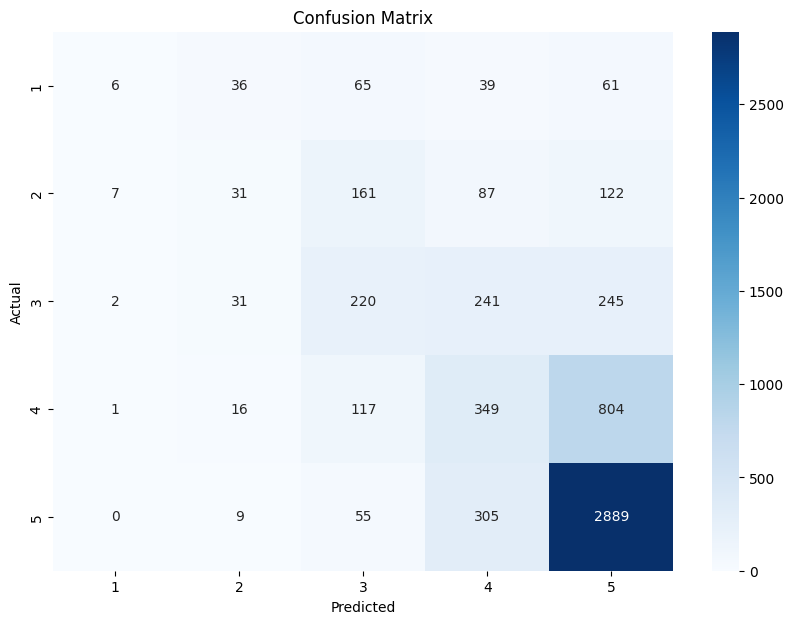

In [200]:
# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(1, 6), yticklabels=np.arange(1, 6))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


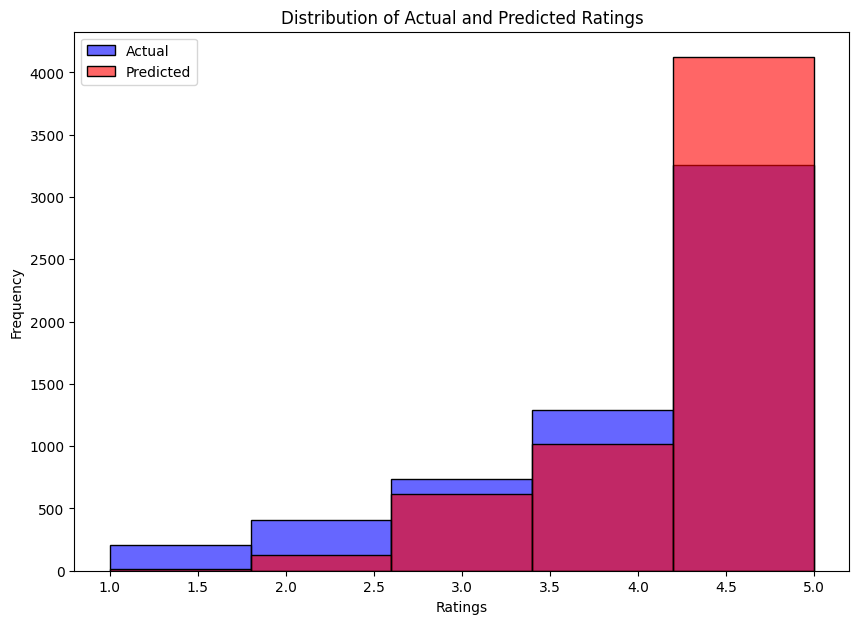

In [196]:
# Plotting the distribution of actual vs predicted ratings
plt.figure(figsize=(10, 7))
sns.histplot(y_test, color='blue', alpha=0.6, bins=5, label='Actual')
sns.histplot(y_pred, color='red', alpha=0.6, bins=5, label='Predicted')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.title('Distribution of Actual and Predicted Ratings')
plt.legend()
plt.show()

**EXPLANATION**

1. **Dataset Overview**:

The dataset contains reviews for women's clothing from an e-commerce platform. Key columns include:

* Review: Text of the review.
* Rating: Rating given by the user (target variable).
* Other columns like Age, Title, Recommended, etc.

2. **Data Preprocessing**:

* Handling Missing Values: We filled missing reviews with "No Review" and dropped rows with missing values in other columns.
* Defining Target and Features: The Review column is the feature (X) and Rating is the target (y).

3. **Splitting Data**:

* The data is split into training (70%) and testing (30%) sets. Stratification ensures the distribution of ratings remains consistent across both sets.

4. **Text Vectorization**:

* CountVectorizer: This converts the text reviews into a matrix of token counts (ngrams of length 2 and 3, with English stop words removed). This step transforms text data into numerical form that can be used by the machine learning model.

5. **Model Training**:

* Multinomial Naive Bayes: This model is suitable for classification with discrete features. We fit the model on the training data.

6. **Model Prediction**:

* The model predicts ratings on the test data.

7. **Conclusion**

    These visualizations help diagnose the model's performance:

* **Confusion Matrix Heatmap**: Provides detailed insights into where the model is making correct predictions and where it is misclassifying.
* **Histogram of Ratings:** Offers a quick comparison between the overall distributions of actual and predicted ratings, highlighting any systematic biases in the predictions.